In [12]:
# Import nesessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
# Load data from pickle
df = pd.read_pickle("Loan_status.pkl")

In [15]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3

In [16]:
# Read the file 
# df = pd.read_csv("Loan_status_2007-2020Q3.gzip", on_bad_lines="skip", low_memory=False)

In [17]:
# Save file to pickle to save time
# df.to_pickle("Loan_status.pkl")

# Split Dataset into Training, Validation, Testing and Untouched Sets

In [18]:
## Split Dataset
from sklearn.model_selection import train_test_split

# Step 1: Split off untouched data (10%)
df_train_val, df_untouched = train_test_split(df, test_size=0.10, random_state=42)
df_train_val = df_train_val.copy()  # Avoid SettingWithCopyWarning
df_untouched = df_untouched.copy()
df_untouched["set_flag"] = 0  # Mark untouched

# Step 2: Split remaining into train (50%), validation (20%), and test (20%)
df_train, df_temp = train_test_split(df_train_val, test_size=0.40, random_state=42)
df_train = df_train.copy()
df_temp = df_temp.copy()
df_train["set_flag"] = 1  # Mark train

df_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)
df_val = df_val.copy()
df_test = df_test.copy()
df_val["set_flag"] = 2  # Mark validation
df_test["set_flag"] = 3  # Mark test

# Combine all subsets back into one dataframe
df_final = pd.concat([df_train, df_val, df_test, df_untouched], ignore_index=True)

# Save as Parquet for efficient storage
df_final.to_parquet("dataset_with_flags.parquet", index=False)

# Check dataset sizes
print(f"Training Set: {len(df_train)} rows ({len(df_train)/len(df)*100:.1f}%)")
print(f"Validation Set: {len(df_val)} rows ({len(df_val)/len(df)*100:.1f}%)")
print(f"Test Set: {len(df_test)} rows ({len(df_test)/len(df)*100:.1f}%)")
print(f"Untouched Set: {len(df_untouched)} rows ({len(df_untouched)/len(df)*100:.1f}%)")

print("Data saved with set_flag column.")



Training Set: 1579765 rows (54.0%)
Validation Set: 526589 rows (18.0%)
Test Set: 526589 rows (18.0%)
Untouched Set: 292550 rows (10.0%)
Data saved with set_flag column.


In [19]:
# Dimension of training set
df_train.shape

(1579765, 143)

# Data Processing

## 1. Drop features with > 50% missing values

In [20]:
## Drop features with > 50% missing values
missing_percent = (df_train.isna().sum() / len(df_train))* 100
cols_to_drop = missing_percent[missing_percent > 50].index
print(cols_to_drop)
df_train_dropped = df_train.drop(columns=cols_to_drop)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')


In [21]:
# Identify columns with string (object) content
string_columns = df_train_dropped.select_dtypes(include=['object']).columns.tolist()

# Display the list of column names containing string content
string_columns


['id',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag']

# Convert String to Numeric

## 1. Convert id to numeric

In [22]:
## convert id to numeric
df_train_dropped['id'] = pd.to_numeric(df_train_dropped['id'], errors='coerce').astype('Int64')
# check if there'are any NAs
df_train_dropped['id'].isna().any()
df_train_dropped['id'].isna().sum()

# show the column with NA id
df_train_dropped[df_train_dropped['id'].isna()]

# drop the entire row 39786 because it's empty
df_train_dropped = df_train_dropped.drop(39786)
df_train_dropped.shape



(1579764, 108)

In [23]:
# check result
df_train_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,set_flag
1156958,73975,151456058,35000.0,35000.0,35000.0,36 months,16.40%,1237.42,C,C4,VP Business Planning & Analysis,10+ years,MORTGAGE,124000.0,Verified,May-2019,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,627xx,IL,30.15,0.0,Nov-1997,690.0,694.0,1.0,17.0,0.0,50995.0,89%,33.0,w,26055.42,26055.42,13547.840000,13547.84,8944.58,4603.26,0.00,0.0,0.0,Jun-2020,0.00,May-2020,684.0,680.0,0.0,1.0,Individual,0.0,0.0,203897.0,0.0,2.0,1.0,1.0,12.0,41391.0,68.0,1.0,1.0,12060.0,89.0,57490.0,1.0,6.0,1.0,2.0,11993.0,4256.0,96.0,0.0,0.0,157.0,258.0,10.0,10.0,1.0,10.0,6.0,0.0,8.0,14.0,10.0,10.0,12.0,14.0,20.0,15.0,17.0,NaN,0.0,0.0,2.0,100.0,100.0,0.0,0.0,246055.0,104457.0,34050.0,61019.0,Y,N,1
1096736,13753,152802725,15000.0,15000.0,15000.0,60 months,10.33%,321.15,B,B1,SALES,10+ years,MORTGAGE,110250.0,Not Verified,Jun-2019,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,601xx,IL,13.54,1.0,Oct-1985,710.0,714.0,2.0,15.0,0.0,11884.0,20.3%,37.0,f,0.00,0.00,1292.050000,1292.05,778.08,497.91,16.06,0.0,0.0,Nov-2019,337.21,Oct-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,170230.0,2.0,1.0,0.0,1.0,14.0,18303.0,73.0,2.0,2.0,4523.0,36.0,58600.0,1.0,0.0,2.0,4.0,11349.0,27627.0,29.7,0.0,0.0,113.0,244.0,6.0,6.0,4.0,58.0,2.0,1.0,7.0,8.0,7.0,14.0,4.0,13.0,28.0,8.0,15.0,0.0,0.0,0.0,2.0,80.6,0.0,0.0,0.0,226151.0,30187.0,39300.0,25101.0,N,N,1
2421009,132153,68564941,12000.0,12000.0,12000.0,60 months,11.99%,266.88,C,C1,Child Support Specialist,2 years,MORTGAGE,45000.0,Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,543xx,WI,20.99,1.0,Sep-2003,680.0,684.0,1.0,17.0,1.0,8980.0,28%,25.0,w,0.00,0.00,12991.860000,12991.86,12000.00,991.86,0.00,0.0,0.0,Sep-2016,11131.69,May-2020,699.0,695.0,0.0,1.0,Individual,0.0,8.0,98679.0,2.0,4.0,0.0,1.0,11.0,18849.0,82.0,2.0,5.0,6199.0,28.0,32350.0,0.0,0.0,2.0,6.0,5804.0,3079.0,38.0,0.0,0.0,147.0,146.0,2.0,2.0,1.0,5.0,5.0,0.0,7.0,12.0,9.0,9.0,8.0,12.0,16.0,4.0,17.0,NaN,0.0,0.0,2.0,96.0,28.6,1.0,0.0,131531.0,27829.0,21550.0,22931.0,N,N,1
1957494,89733,63216388,10500.0,10500.0,10500.0,36 months,5.32%,316.21,A,A1,Recruiter II,1 year,MORTGAGE,58000.0,Not Verified,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,488xx,MI,17.92,0.0,Feb-2000,730.0,734.0,0.0,29.0,0.0,9841.0,28.8%,49.0,f,0.00,0.00,10851.830001,10851.83,10500.00,351.83,0.00,0.0,0.0,Sep-201

## 2. Convert emp_title to Numeric (Drop)

Reasons to drop feature emp_title:

1. High cardinality -- 372,749 unique values in 1,579,764 rows (~24% unique), making it difficult to extract meaningful patterns.
2. Encoding challenge -- One-hot encoding is impractical due to excessive feature expansion; label encoding introduces arbitrary ordinal relationships

In [24]:
## Drop emp_title column (too many distinct emp_titles)
df_train_dropped.drop(columns=["emp_title"], inplace=True)

df_train_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,set_flag
1156958,73975,151456058,35000.0,35000.0,35000.0,36 months,16.40%,1237.42,C,C4,10+ years,MORTGAGE,124000.0,Verified,May-2019,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,627xx,IL,30.15,0.0,Nov-1997,690.0,694.0,1.0,17.0,0.0,50995.0,89%,33.0,w,26055.42,26055.42,13547.840000,13547.84,8944.58,4603.26,0.00,0.0,0.0,Jun-2020,0.00,May-2020,684.0,680.0,0.0,1.0,Individual,0.0,0.0,203897.0,0.0,2.0,1.0,1.0,12.0,41391.0,68.0,1.0,1.0,12060.0,89.0,57490.0,1.0,6.0,1.0,2.0,11993.0,4256.0,96.0,0.0,0.0,157.0,258.0,10.0,10.0,1.0,10.0,6.0,0.0,8.0,14.0,10.0,10.0,12.0,14.0,20.0,15.0,17.0,NaN,0.0,0.0,2.0,100.0,100.0,0.0,0.0,246055.0,104457.0,34050.0,61019.0,Y,N,1
1096736,13753,152802725,15000.0,15000.0,15000.0,60 months,10.33%,321.15,B,B1,10+ years,MORTGAGE,110250.0,Not Verified,Jun-2019,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,601xx,IL,13.54,1.0,Oct-1985,710.0,714.0,2.0,15.0,0.0,11884.0,20.3%,37.0,f,0.00,0.00,1292.050000,1292.05,778.08,497.91,16.06,0.0,0.0,Nov-2019,337.21,Oct-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,170230.0,2.0,1.0,0.0,1.0,14.0,18303.0,73.0,2.0,2.0,4523.0,36.0,58600.0,1.0,0.0,2.0,4.0,11349.0,27627.0,29.7,0.0,0.0,113.0,244.0,6.0,6.0,4.0,58.0,2.0,1.0,7.0,8.0,7.0,14.0,4.0,13.0,28.0,8.0,15.0,0.0,0.0,0.0,2.0,80.6,0.0,0.0,0.0,226151.0,30187.0,39300.0,25101.0,N,N,1
2421009,132153,68564941,12000.0,12000.0,12000.0,60 months,11.99%,266.88,C,C1,2 years,MORTGAGE,45000.0,Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,543xx,WI,20.99,1.0,Sep-2003,680.0,684.0,1.0,17.0,1.0,8980.0,28%,25.0,w,0.00,0.00,12991.860000,12991.86,12000.00,991.86,0.00,0.0,0.0,Sep-2016,11131.69,May-2020,699.0,695.0,0.0,1.0,Individual,0.0,8.0,98679.0,2.0,4.0,0.0,1.0,11.0,18849.0,82.0,2.0,5.0,6199.0,28.0,32350.0,0.0,0.0,2.0,6.0,5804.0,3079.0,38.0,0.0,0.0,147.0,146.0,2.0,2.0,1.0,5.0,5.0,0.0,7.0,12.0,9.0,9.0,8.0,12.0,16.0,4.0,17.0,NaN,0.0,0.0,2.0,96.0,28.6,1.0,0.0,131531.0,27829.0,21550.0,22931.0,N,N,1
1957494,89733,63216388,10500.0,10500.0,10500.0,36 months,5.32%,316.21,A,A1,1 year,MORTGAGE,58000.0,Not Verified,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,488xx,MI,17.92,0.0,Feb-2000,730.0,734.0,0.0,29.0,0.0,9841.0,28.8%,49.0,f,0.00,0.00,10851.830001,10851.83,10500.00,351.83,0.00,0.0,0.0,Sep-2016,1524.72,Jul-2017,769.0,765.0,0.0,1.0,Individual,0.0,0.0,269159.0,NaN,NaN,NaN,NaN,NaN

## 3. Convert home_ownership to Numerical (One-hot Encoding)

In [25]:
## Convert home_ownership into numerical
df_train_dropped['home_ownership'].unique()

df_train_dropped['home_ownership'].isnull().sum()

# perform one-hot encoding 
df_train_dropped = pd.get_dummies(df_train_dropped, columns=['home_ownership'], drop_first=False)

# convert the true/false into 1/0
home_ownership_cols = [col for col in df_train_dropped.columns if col.startswith('home_ownership_')]
df_train_dropped[home_ownership_cols] = df_train_dropped[home_ownership_cols].astype(int)
df_train_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,set_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
1156958,73975,151456058,35000.0,35000.0,35000.0,36 months,16.40%,1237.42,C,C4,10+ years,124000.0,Verified,May-2019,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,627xx,IL,30.15,0.0,Nov-1997,690.0,694.0,1.0,17.0,0.0,50995.0,89%,33.0,w,26055.42,26055.42,13547.840000,13547.84,8944.58,4603.26,0.00,0.0,0.0,Jun-2020,0.00,May-2020,684.0,680.0,0.0,1.0,Individual,0.0,0.0,203897.0,0.0,2.0,1.0,1.0,12.0,41391.0,68.0,1.0,1.0,12060.0,89.0,57490.0,1.0,6.0,1.0,2.0,11993.0,4256.0,96.0,0.0,0.0,157.0,258.0,10.0,10.0,1.0,10.0,6.0,0.0,8.0,14.0,10.0,10.0,12.0,14.0,20.0,15.0,17.0,NaN,0.0,0.0,2.0,100.0,100.0,0.0,0.0,246055.0,104457.0,34050.0,61019.0,Y,N,1,0,1,0,0,0,0
1096736,13753,152802725,15000.0,15000.0,15000.0,60 months,10.33%,321.15,B,B1,10+ years,110250.0,Not Verified,Jun-2019,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,601xx,IL,13.54,1.0,Oct-1985,710.0,714.0,2.0,15.0,0.0,11884.0,20.3%,37.0,f,0.00,0.00,1292.050000,1292.05,778.08,497.91,16.06,0.0,0.0,Nov-2019,337.21,Oct-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,170230.0,2.0,1.0,0.0,1.0,14.0,18303.0,73.0,2.0,2.0,4523.0,36.0,58600.0,1.0,0.0,2.0,4.0,11349.0,27627.0,29.7,0.0,0.0,113.0,244.0,6.0,6.0,4.0,58.0,2.0,1.0,7.0,8.0,7.0,14.0,4.0,13.0,28.0,8.0,15.0,0.0,0.0,0.0,2.0,80.6,0.0,0.0,0.0,226151.0,30187.0,39300.0,25101.0,N,N,1,0,1,0,0,0,0
2421009,132153,68564941,12000.0,12000.0,12000.0,60 months,11.99%,266.88,C,C1,2 years,45000.0,Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,543xx,WI,20.99,1.0,Sep-2003,680.0,684.0,1.0,17.0,1.0,8980.0,28%,25.0,w,0.00,0.00,12991.860000,12991.86,12000.00,991.86,0.00,0.0,0.0,Sep-2016,11131.69,May-2020,699.0,695.0,0.0,1.0,Individual,0.0,8.0,98679.0,2.0,4.0,0.0,1.0,11.0,18849.0,82.0,2.0,5.0,6199.0,28.0,32350.0,0.0,0.0,2.0,6.0,5804.0,3079.0,38.0,0.0,0.0,147.0,146.0,2.0,2.0,1.0,5.0,5.0,0.0,7.0,12.0,9.0,9.0,8.0,12.0,16.0,4.0,17.0,NaN,0.0,0.0,2.0,96.0,28.6,1.0,0.0,131531.0,27829.0,21550.0,22931.0,N,N,1,0,1,0,0,0,0
1957494,89733,63216388,10500.0,10500.0,10500.0,36 months,5.32%,316.21,A,A1,1 year,58000.0,Not Verified,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,488xx,MI,17.92,0.0,Feb-2000,730.0,734.0,0.0,29.0,0.0,9841.0,28.8%,49.0,f,0.00,0.00,10851.830001,10851.83,10500.00,351.8

## 4. Convert verification_status to Numerical (One-hot Encoding)

In [26]:
## convert verification_status
df_train_dropped['verification_status'].unique()
df_train_dropped['verification_status'].isnull().sum()

# one-hot encoding 
df_train_dropped = pd.get_dummies(df_train_dropped, columns=['verification_status'], drop_first=False)

# convert true/false to 1/0
verification_status_cols = [col for col in df_train_dropped.columns if col.startswith('verification_status_')]
df_train_dropped[verification_status_cols] = df_train_dropped[verification_status_cols].astype(int)
df_train_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,set_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
1156958,73975,151456058,35000.0,35000.0,35000.0,36 months,16.40%,1237.42,C,C4,10+ years,124000.0,May-2019,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,627xx,IL,30.15,0.0,Nov-1997,690.0,694.0,1.0,17.0,0.0,50995.0,89%,33.0,w,26055.42,26055.42,13547.840000,13547.84,8944.58,4603.26,0.00,0.0,0.0,Jun-2020,0.00,May-2020,684.0,680.0,0.0,1.0,Individual,0.0,0.0,203897.0,0.0,2.0,1.0,1.0,12.0,41391.0,68.0,1.0,1.0,12060.0,89.0,57490.0,1.0,6.0,1.0,2.0,11993.0,4256.0,96.0,0.0,0.0,157.0,258.0,10.0,10.0,1.0,10.0,6.0,0.0,8.0,14.0,10.0,10.0,12.0,14.0,20.0,15.0,17.0,NaN,0.0,0.0,2.0,100.0,100.0,0.0,0.0,246055.0,104457.0,34050.0,61019.0,Y,N,1,0,1,0,0,0,0,0,0,1
1096736,13753,152802725,15000.0,15000.0,15000.0,60 months,10.33%,321.15,B,B1,10+ years,110250.0,Jun-2019,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,601xx,IL,13.54,1.0,Oct-1985,710.0,714.0,2.0,15.0,0.0,11884.0,20.3%,37.0,f,0.00,0.00,1292.050000,1292.05,778.08,497.91,16.06,0.0,0.0,Nov-2019,337.21,Oct-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,170230.0,2.0,1.0,0.0,1.0,14.0,18303.0,73.0,2.0,2.0,4523.0,36.0,58600.0,1.0,0.0,2.0,4.0,11349.0,27627.0,29.7,0.0,0.0,113.0,244.0,6.0,6.0,4.0,58.0,2.0,1.0,7.0,8.0,7.0,14.0,4.0,13.0,28.0,8.0,15.0,0.0,0.0,0.0,2.0,80.6,0.0,0.0,0.0,226151.0,30187.0,39300.0,25101.0,N,N,1,0,1,0,0,0,0,1,0,0
2421009,132153,68564941,12000.0,12000.0,12000.0,60 months,11.99%,266.88,C,C1,2 years,45000.0,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,543xx,WI,20.99,1.0,Sep-2003,680.0,684.0,1.0,17.0,1.0,8980.0,28%,25.0,w,0.00,0.00,12991.860000,12991.86,12000.00,991.86,0.00,0.0,0.0,Sep-2016,11131.69,May-2020,699.0,695.0,0.0,1.0,Individual,0.0,8.0,98679.0,2.0,4.0,0.0,1.0,11.0,18849.0,82.0,2.0,5.0,6199.0,28.0,32350.0,0.0,0.0,2.0,6.0,5804.0,3079.0,38.0,0.0,0.0,147.0,146.0,2.0,2.0,1.0,5.0,5.0,0.0,7.0,12.0,9.0,9.0,8.0,12.0,16.0,4.0,17.0,NaN,0.0,0.0,2.0,96.0,28.6,1.0,0.0,131531.0,27829.0,21550.0,22931.0,N,N,1,0,1,0,0,0,0,0,0,1
1957494,89733,63216388,10500.0,10500.0,10500.0,36 months,5.32%,316.21,A,A1,1 year,58000.0,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,488xx,MI,17.92,0.0,Feb-2000,730.0,734.0,0.0,29.0,0.0,9841.0,28.8%,4

## 5. Convert issue_d to Numerical 

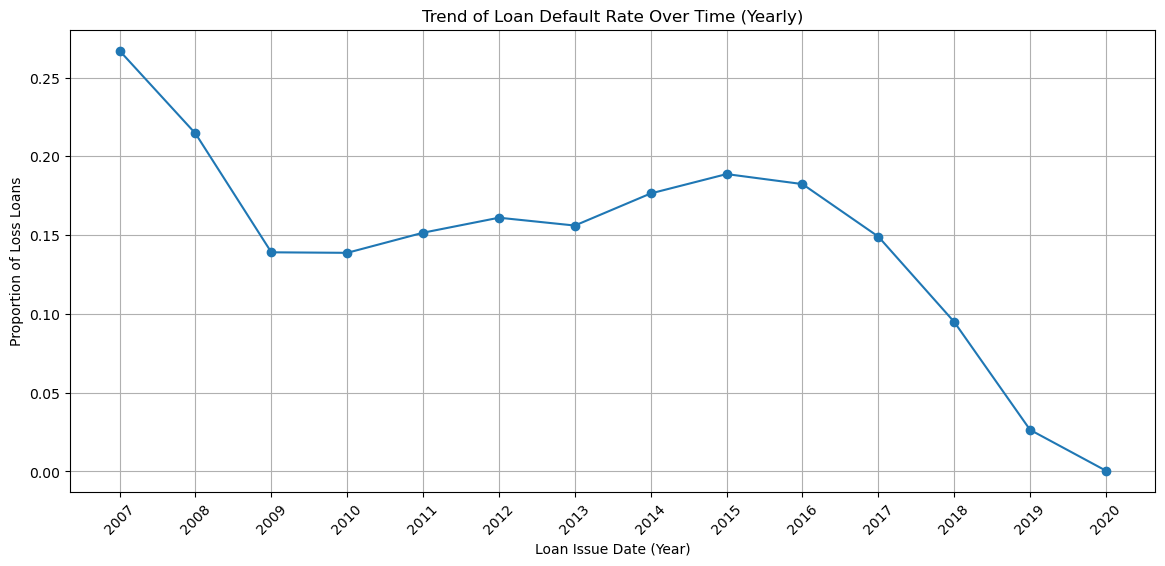

In [27]:
## convert issue_d
df_train_dropped['issue_d'].head()

df_train_dropped['issue_d'].isnull().sum()

df_train_dropped['loan_status'].unique()

# create categories for loan status
loss = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']
good = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Charged Off', 'Issued']
df_train_dropped['loan_category'] = df_train_dropped['loan_status'].apply(lambda x: 'Loss' if x in loss else ('Good' if x in good else 'Other'))
df_train_dropped['loan_category'].value_counts()

# Convert issue_d to datetime
df_train_dropped['issue_d'] = pd.to_datetime(df_train_dropped['issue_d'], format='%b-%Y')
# Group by month-year and calculate the proportion of "loss" loans
loss_rate = df_train_dropped.groupby(df_train_dropped['issue_d'].dt.to_period('Y'))['loan_category'].apply(lambda x: (x == 'Loss').mean())

# Plot the trend
plt.figure(figsize=(14, 6))
#x_labels = loss_rate.index.astype(str)[::4]  # Show every 4th label
plt.plot(loss_rate.index.astype(str), loss_rate.values, marker='o', linestyle='-')
#plt.xticks(ticks=x_labels, rotation=45)
plt.xticks(rotation=45)
plt.xlabel("Loan Issue Date (Year)")
plt.ylabel("Proportion of Loss Loans")
plt.title("Trend of Loan Default Rate Over Time (Yearly)")
plt.grid(True)
plt.show()



In [28]:
# convert issue_d to an Ordinal Feature
df_train_dropped['issue_d_ordinal'] = df_train_dropped['issue_d'].dt.year - df_train_dropped['issue_d'].dt.year.min()
#df_train_dropped.drop(columns=['issue_d'], inplace=True)  # Drop original datetime column

## 6. Convert url to Numeric (Drop)
Reason to drop url: 
1. url unaccessible

In [29]:
## loanDetails that requires investor account to login (Unaccessible)
## Drop column
df_train_dropped.drop(columns=["url"], inplace=True)

df_train_dropped.head()



,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,set_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_category,issue_d_ordinal
1156958,73975,151456058,35000.0,35000.0,35000.0,36 months,16.40%,1237.42,C,C4,10+ years,124000.0,2019-05-01,Current,n,debt_consolidation,Debt consolidation,627xx,IL,30.15,0.0,Nov-1997,690.0,694.0,1.0,17.0,0.0,50995.0,89%,33.0,w,26055.42,26055.42,13547.840000,13547.84,8944.58,4603.26,0.00,0.0,0.0,Jun-2020,0.00,May-2020,684.0,680.0,0.0,1.0,Individual,0.0,0.0,203897.0,0.0,2.0,1.0,1.0,12.0,41391.0,68.0,1.0,1.0,12060.0,89.0,57490.0,1.0,6.0,1.0,2.0,11993.0,4256.0,96.0,0.0,0.0,157.0,258.0,10.0,10.0,1.0,10.0,6.0,0.0,8.0,14.0,10.0,10.0,12.0,14.0,20.0,15.0,17.0,NaN,0.0,0.0,2.0,100.0,100.0,0.0,0.0,246055.0,104457.0,34050.0,61019.0,Y,N,1,0,1,0,0,0,0,0,0,1,Good,12
1096736,13753,152802725,15000.0,15000.0,15000.0,60 months,10.33%,321.15,B,B1,10+ years,110250.0,2019-06-01,Charged Off,n,debt_consolidation,Debt consolidation,601xx,IL,13.54,1.0,Oct-1985,710.0,714.0,2.0,15.0,0.0,11884.0,20.3%,37.0,f,0.00,0.00,1292.050000,1292.05,778.08,497.91,16.06,0.0,0.0,Nov-2019,337.21,Oct-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,170230.0,2.0,1.0,0.0,1.0,14.0,18303.0,73.0,2.0,2.0,4523.0,36.0,58600.0,1.0,0.0,2.0,4.0,11349.0,27627.0,29.7,0.0,0.0,113.0,244.0,6.0,6.0,4.0,58.0,2.0,1.0,7.0,8.0,7.0,14.0,4.0,13.0,28.0,8.0,15.0,0.0,0.0,0.0,2.0,80.6,0.0,0.0,0.0,226151.0,30187.0,39300.0,25101.0,N,N,1,0,1,0,0,0,0,1,0,0,Loss,12
2421009,132153,68564941,12000.0,12000.0,12000.0,60 months,11.99%,266.88,C,C1,2 years,45000.0,2016-01-01,Fully Paid,n,credit_card,Credit card refinancing,543xx,WI,20.99,1.0,Sep-2003,680.0,684.0,1.0,17.0,1.0,8980.0,28%,25.0,w,0.00,0.00,12991.860000,12991.86,12000.00,991.86,0.00,0.0,0.0,Sep-2016,11131.69,May-2020,699.0,695.0,0.0,1.0,Individual,0.0,8.0,98679.0,2.0,4.0,0.0,1.0,11.0,18849.0,82.0,2.0,5.0,6199.0,28.0,32350.0,0.0,0.0,2.0,6.0,5804.0,3079.0,38.0,0.0,0.0,147.0,146.0,2.0,2.0,1.0,5.0,5.0,0.0,7.0,12.0,9.0,9.0,8.0,12.0,16.0,4.0,17.0,NaN,0.0,0.0,2.0,96.0,28.6,1.0,0.0,131531.0,27829.0,21550.0,22931.0,N,N,1,0,1,0,0,0,0,0,0,1,Good,9
1957494,89733,63216388,10500.0,10500.0,10500.0,36 months,5.32%,316.21,A,A1,1 year,58000.0,2015-10-01,Fully Paid,n,credit_card,Credit card refinancing,488xx,MI,17.92,0.0,Feb-2000,730.0,734.0,0.0,29.0,0.0,9841.0,28.8%,49.0,f,0.00,0.00,10851.830001,10851.83,10500.00,351.83,0.00,0.0,0.0,Sep-2016,1524.72,Jul-2017,769.0,765.0,0.0,1.0,Individual,0.0,0.0,269159.0,Na

## 7. Convert Term to Numeric

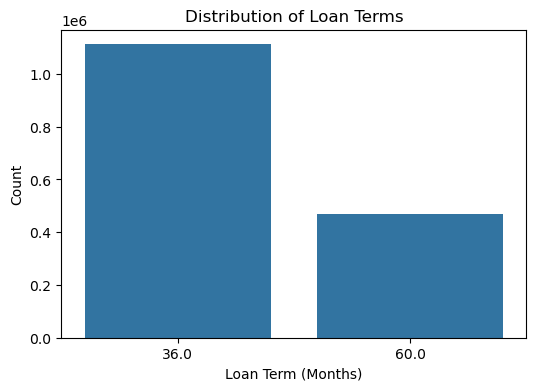

In [30]:
# Check feature Term and convert to numeric
df_train_dropped["term"].unique()

# Convert  numeric 
df_train_dropped["term"] = df_train_dropped["term"].str.extract("(\d+)").astype(float)

# Plot distribution of loan terms
plt.figure(figsize=(6,4))
sns.countplot(x=df_train_dropped["term"])
plt.title("Distribution of Loan Terms")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## 8. Convert int_rate to Numeric

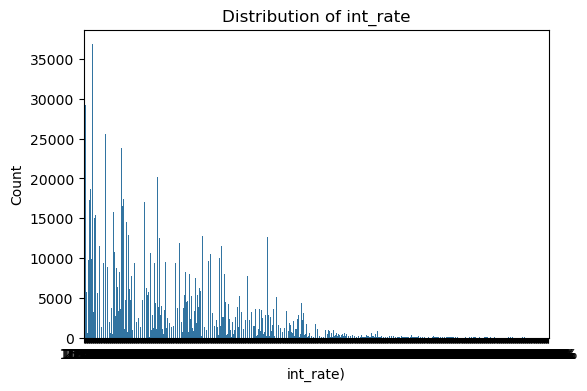

1156958    0.1640
1096736    0.1033
2421009    0.1199
1957494    0.0532
1066003    0.1180
Name: int_rate, dtype: float64

In [31]:
# Check feature int_rate and convert to numeric
df_train_dropped["int_rate"].unique()

# Plot distribution of int_rate
plt.figure(figsize=(6,4))
sns.countplot(x=df_train_dropped["int_rate"])
plt.title("Distribution of int_rate")
plt.xlabel("int_rate)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Convert
df_train_dropped["int_rate"] = df_train_dropped["int_rate"].replace("nan", np.nan)
df_train_dropped["int_rate"] = df_train_dropped["int_rate"].str.replace("%", "").astype(float) / 100
df_train_dropped["int_rate"].head()

## 9. Convert sub_grade to Numeric (Drop grade)

0


/var/folders/q9/ns60znbx5sg2fv9zvqn0qym40000gn/T/ipykernel_74597/2394944847.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_train_dropped["sub_grade"], order=sorted(df_train_dropped["sub_grade"].unique()), palette="Blues_r")


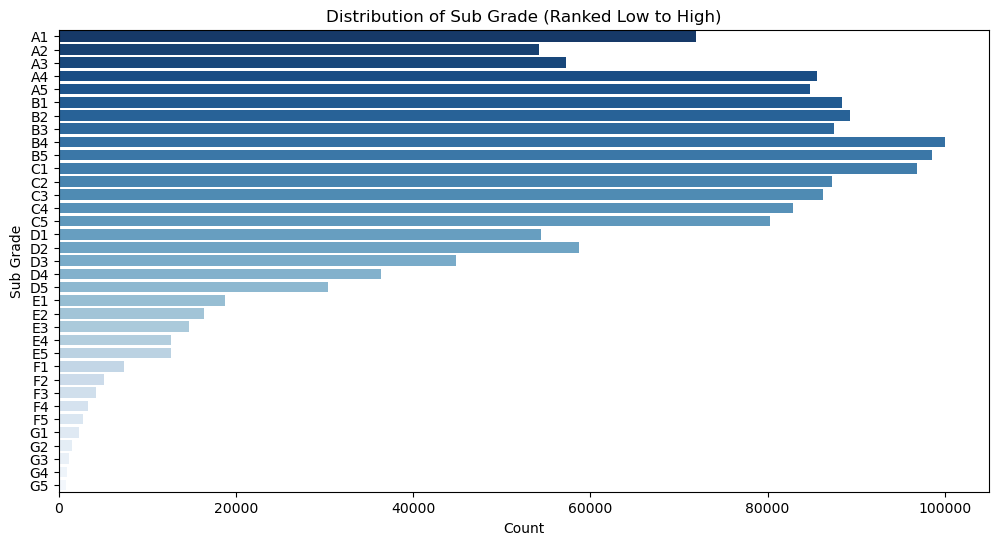

In [32]:
# Check feature grade and subgrade
df_train_dropped["grade"].unique()
df_train_dropped["sub_grade"].unique()

# Possible feature engineering: Combine into one feature A=1, B=2, C=3, D=4, E=5, F=6, G=7 (Smaller number has lower risk)===> 
# Use only converted sub_grade, drop feature grade
df_train_dropped = df_train_dropped.drop(["grade"], axis=1)

# Define base values for grades (lower = better credit, higher = higher risk)
grade_mapping = {"A" :1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7}

# Convert nan to np.nan
df_train_dropped["sub_grade"] = df_train_dropped["sub_grade"].replace("nan", np.nan)

# Check if has nan valus (1 nan)
df_train_dropped["sub_grade"].isna().sum()

# Check if the original "nan" value converted to np.nan (All converted)
print((df_train_dropped["sub_grade"] == "nan").sum())

# Plot the distribution of sub_grade with proper ranking from low to high
plt.figure(figsize=(12, 6))
sns.countplot(y=df_train_dropped["sub_grade"], order=sorted(df_train_dropped["sub_grade"].unique()), palette="Blues_r")
plt.title("Distribution of Sub Grade (Ranked Low to High)")
plt.xlabel("Count")
plt.ylabel("Sub Grade")
plt.show()


# Convert sub_grade into an ordered numeric feature where A1 is lowest risk and G5 is highest risk
df_train_dropped["sub_grade"] = df_train_dropped["sub_grade"].apply(lambda x: grade_mapping[str(x)[0]] * 10 + int(str(x)[1]) if pd.notna(x) else np.nan)



## 10. Convert emp_length to Numeric

In [33]:
# Check feature emp_length
df_train_dropped["emp_length"].unique()

def convert_emp_length(emp):
    if pd.isna(emp):  # Handle missing values
        return np.nan
    if emp == "10+ years":
        return 10
    elif emp == "< 1 year":
        return 0
    else:
        return int(emp.split()[0])  # Extract the number from "X years"
## Check below for convertion criterion


## Convert emp_length to numeric
df_train_dropped["emp_length"] = df_train_dropped["emp_length"].apply(convert_emp_length)

In [34]:
# Handeling 'purpose', 'title', 'zip_code', 'addr_state',

df_train_dropped["purpose"].unique()



array(['debt_consolidation', 'credit_card', 'major_purchase', 'car',
       'home_improvement', 'vacation', 'other', 'medical',
       'renewable_energy', 'house', 'moving', 'small_business',
       'educational', 'wedding'], dtype=object)

## 11. Convert Purpose to Numeric


In [35]:
# Convert "purpose" from string to numeric
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'purpose' column
df_train_dropped["purpose"] = le.fit_transform(df_train_dropped["purpose"])

# View unique mappings
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11, 'vacation': 12, 'wedding': 13}


## 12.Convert Title to Numeric (Drop)

In [36]:
# Convert 'title' from strings to numeric (Since similar to "Purpose, drop it")
num_unique_titles = df_train_dropped["title"].nunique()
title_counts = df_train_dropped["title"].value_counts()
purpose_counts = df_train_dropped["purpose"].value_counts()

df_train_dropped = df_train_dropped.drop(columns=["title"])



## 13. Convert zip_code, addr_state to Numeric(Drop)

In [37]:
# Convert "zip_code" to numeric
df_train_dropped["zip_code"].unique()

# Drop zip_code
df_train_dropped = df_train_dropped.drop(columns=["zip_code"])

# Drop "addr_state"
df_train_dropped["addr_state"].unique()


array(['IL', 'WI', 'MI', 'CO', 'CA', 'OH', 'TX', 'NJ', 'DE', 'FL', 'NY',
       'CT', 'WA', 'SC', 'TN', 'MD', 'OK', 'NV', 'AZ', 'MN', 'AL', 'NC',
       'DC', 'GA', 'LA', 'MO', 'MT', 'VA', 'IN', 'MS', 'MA', 'ME', 'OR',
       'KY', 'VT', 'PA', 'NH', 'NM', 'RI', 'AR', 'WY', 'SD', 'UT', 'NE',
       'WV', 'IA', 'KS', 'HI', 'ID', 'AK', 'ND'], dtype=object)

In [38]:
# Check df after column dropping
df_train_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,set_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_category,issue_d_ordinal
1156958,73975,151456058,35000.0,35000.0,35000.0,36.0,0.1640,1237.42,34,10.0,124000.0,2019-05-01,Current,n,2,IL,30.15,0.0,Nov-1997,690.0,694.0,1.0,17.0,0.0,50995.0,89%,33.0,w,26055.42,26055.42,13547.840000,13547.84,8944.58,4603.26,0.00,0.0,0.0,Jun-2020,0.00,May-2020,684.0,680.0,0.0,1.0,Individual,0.0,0.0,203897.0,0.0,2.0,1.0,1.0,12.0,41391.0,68.0,1.0,1.0,12060.0,89.0,57490.0,1.0,6.0,1.0,2.0,11993.0,4256.0,96.0,0.0,0.0,157.0,258.0,10.0,10.0,1.0,10.0,6.0,0.0,8.0,14.0,10.0,10.0,12.0,14.0,20.0,15.0,17.0,NaN,0.0,0.0,2.0,100.0,100.0,0.0,0.0,246055.0,104457.0,34050.0,61019.0,Y,N,1,0,1,0,0,0,0,0,0,1,Good,12
1096736,13753,152802725,15000.0,15000.0,15000.0,60.0,0.1033,321.15,21,10.0,110250.0,2019-06-01,Charged Off,n,2,IL,13.54,1.0,Oct-1985,710.0,714.0,2.0,15.0,0.0,11884.0,20.3%,37.0,f,0.00,0.00,1292.050000,1292.05,778.08,497.91,16.06,0.0,0.0,Nov-2019,337.21,Oct-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,170230.0,2.0,1.0,0.0,1.0,14.0,18303.0,73.0,2.0,2.0,4523.0,36.0,58600.0,1.0,0.0,2.0,4.0,11349.0,27627.0,29.7,0.0,0.0,113.0,244.0,6.0,6.0,4.0,58.0,2.0,1.0,7.0,8.0,7.0,14.0,4.0,13.0,28.0,8.0,15.0,0.0,0.0,0.0,2.0,80.6,0.0,0.0,0.0,226151.0,30187.0,39300.0,25101.0,N,N,1,0,1,0,0,0,0,1,0,0,Loss,12
2421009,132153,68564941,12000.0,12000.0,12000.0,60.0,0.1199,266.88,31,2.0,45000.0,2016-01-01,Fully Paid,n,1,WI,20.99,1.0,Sep-2003,680.0,684.0,1.0,17.0,1.0,8980.0,28%,25.0,w,0.00,0.00,12991.860000,12991.86,12000.00,991.86,0.00,0.0,0.0,Sep-2016,11131.69,May-2020,699.0,695.0,0.0,1.0,Individual,0.0,8.0,98679.0,2.0,4.0,0.0,1.0,11.0,18849.0,82.0,2.0,5.0,6199.0,28.0,32350.0,0.0,0.0,2.0,6.0,5804.0,3079.0,38.0,0.0,0.0,147.0,146.0,2.0,2.0,1.0,5.0,5.0,0.0,7.0,12.0,9.0,9.0,8.0,12.0,16.0,4.0,17.0,NaN,0.0,0.0,2.0,96.0,28.6,1.0,0.0,131531.0,27829.0,21550.0,22931.0,N,N,1,0,1,0,0,0,0,0,0,1,Good,9
1957494,89733,63216388,10500.0,10500.0,10500.0,36.0,0.0532,316.21,11,1.0,58000.0,2015-10-01,Fully Paid,n,1,MI,17.92,0.0,Feb-2000,730.0,734.0,0.0,29.0,0.0,9841.0,28.8%,49.0,f,0.00,0.00,10851.830001,10851.83,10500.00,351.83,0.00,0.0,0.0,Sep-2016,1524.72,Jul-2017,769.0,765.0,0.0,1.0,Individual,0.0,0.0,269159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34200.0,NaN,NaN,NaN,6.0,9281.0,10659.0,48.0,0.0,0.0,81.0,188.0,25.0,2.0,2.0,25.0,5.0,0.0,2.0,2.0,3.0,7.0,26.0,6.0,21.0,2.0,29.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,290855.0,87000.0,20500.0,